# Kernels Ridge Regression

> Kernel Ridge Regression (KRR) is a powerful machine learning technique that combines Ridge Regression with kernel methods. It is particularly useful for non-linear regression tasks where the relationship between the features and the target variable is complex.

- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp kernels

## Basics of Ridge Regression

> Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting.

Cost(w)=∑i=1n​(yi​−yi​^​)2+λ∑j=1p​wj2​

where:
- yiyi​ is the true value,
- yi^yi​^​ is the predicted value,
- wjwj​ are the model coefficients,
- λλ is the regularization parameter.

## Kernels

> Kernel methods involve using a kernel function to implicitly map the input features into a higher-dimensional space where a linear relationship might exist. This allows the model to capture non-linear relationships in the original feature space.

Common kernel functions include:

- Linear Kernel: k(x,x′)=x⋅x′k(x,x′)=x⋅x′
- Polynomial Kernel: k(x,x′)=(x⋅x′+1)dk(x,x′)=(x⋅x′+1)d
- Gaussian (RBF) Kernel: k(x,x′)=exp⁡(−γ∥x−x′∥2)k(x,x′)=exp(−γ∥x−x′∥2)

Advantages of KRR

- Non-linearity: It can model complex, non-linear relationships.
- Flexibility: Different kernels can be used to capture various data patterns.
- Regularization: The regularization term helps prevent overfitting.

Disadvantages of KRR
- Computational Cost: Computing the kernel matrix can be computationally expensive, especially for large datasets.
- Parameter Tuning: Choosing the right kernel and regularization parameter λλ can be challenging and often requires cross-validation.

## Implementation

In [ ]:

# Example data
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([1, 2, 3])



# Make predictions
predictions = krr.predict(X)


In [ ]:
#| eval: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
#| eval: false
path = Path('Data/homeprices.csv')
df = pd.read_csv(path)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


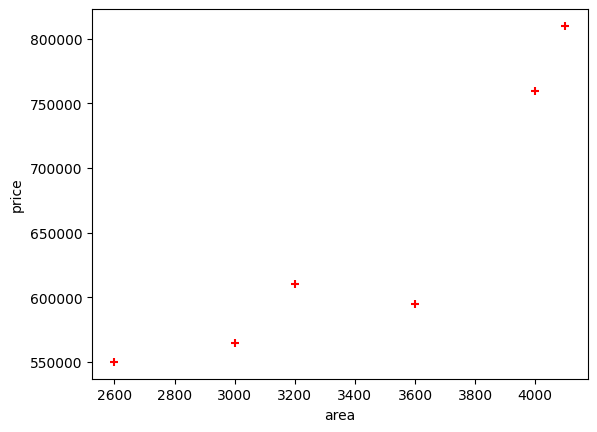

In [ ]:
#| eval: false
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

plt.show()

In [ ]:
#| eval: false
new_df = df.drop('price',axis='columns')
new_df = new_df.drop('bedrooms',axis='columns')
new_df = new_df.drop('age',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4100


In [ ]:
#| eval: false
price = df.price
price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [ ]:
from sklearn.kernel_ridge import KernelRidge


In [ ]:
# Define the model
krr = KernelRidge(alpha=.1, kernel='rbf')

# Fit the model
krr.fit(new_df, price)

KernelRidge(alpha=0.1, kernel='rbf')

In [ ]:
#| eval: false
krr.predict([[3300]])

/home/ben/miniconda3/envs/pfast/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


array([0.])

In [ ]:
#| eval: false
krr.predict([[5000]])

/home/ben/miniconda3/envs/pfast/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


array([0.])

In [ ]:
#| eval: false
numbers_list = list(range(2000, 4000, 100))

In [ ]:
#| eval: false
# Create a DataFrame using the pandas constructor and a dictionary
data = {'area': numbers_list}
area_df = pd.DataFrame(data)
area_df

,area
0,2000
1,2100
2,2200
3,2300
4,2400
5,2500
6,2600
7,2700
8,2800
9,2900


In [ ]:
#| eval: false
p = krr.predict(area_df)
p

array([     0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        , 500000.        ,      0.        ,
            0.        ,      0.        , 513636.36363636,      0.        ,
       554545.45454545,      0.        ,      0.        ,      0.        ,
       540909.09090909,      0.        ,      0.        ,      0.        ])

[<matplotlib.lines.Line2D>]

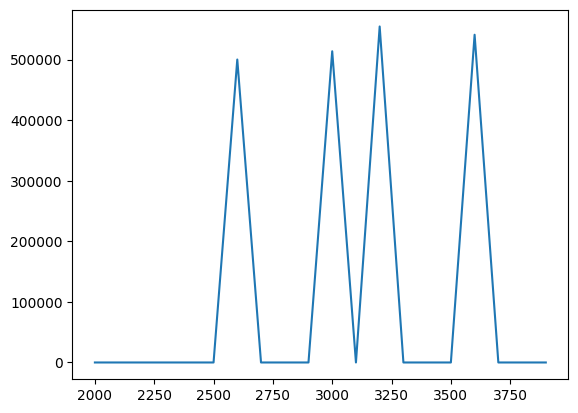

In [ ]:
plt.plot(area_df, p)